# EDA 3 18/8

Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
plt.rcParams["figure.figsize"] = (10,8)
import warnings
warnings.filterwarnings('ignore')

2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:
- En la primera gráfica tendremos que contestar la siguiente pregunta: ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?. Para eso tendréis que:
Crear un subplot con dos gráficas.
  - En la primera gráfica tendréis que mostrar la relación que existe entre la severidad y el tiempo de resolución. ¿Son los tickets que tienen una severidad más alta los que más tardan en resolverse?
  - En la segunda gráfica tendréis que mostrar la relación que existe entre la prioridad y el tiempo de resolución. ¿Son los tickets que tienen una prioridad más alta los que más tardan en resolverse?

In [3]:
df = pd.read_csv("data/historico_tickets_limpio_pandas.csv", index_col = 0)

In [4]:
df.head(2)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97386 entries, 0 to 29087
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_ticket        97386 non-null  object
 1   fecha            97386 non-null  object
 2   id_empleado      97386 non-null  int64 
 3   id_agente        97386 non-null  int64 
 4   categoría        97386 non-null  object
 5   tipo             97386 non-null  object
 6   severidad        97386 non-null  object
 7   prioridad        97386 non-null  object
 8   días_resolución  97386 non-null  int64 
 9   satisfacción     97386 non-null  int64 
 10  semestre         97386 non-null  object
 11  año              97386 non-null  int64 
 12  mes              97386 non-null  object
dtypes: int64(5), object(8)
memory usage: 10.4+ MB


<Axes: xlabel='severidad', ylabel='días_resolución'>

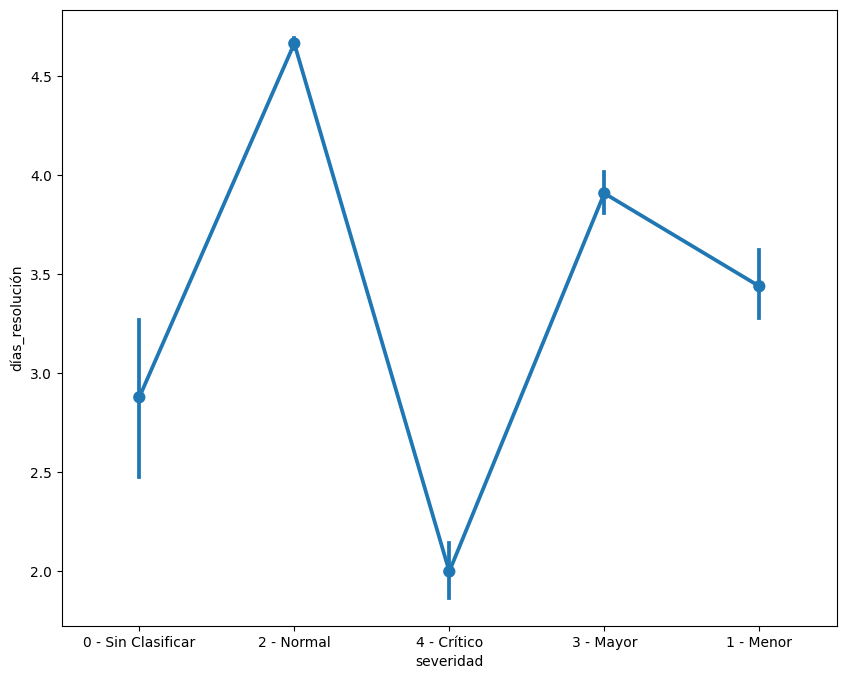

In [10]:
sns.pointplot(x = "severidad", y = "días_resolución", data = df)

Los tickets con mayor severidad son los que se resuelven antes con una media de dos días para resolver.

<Axes: xlabel='prioridad', ylabel='días_resolución'>

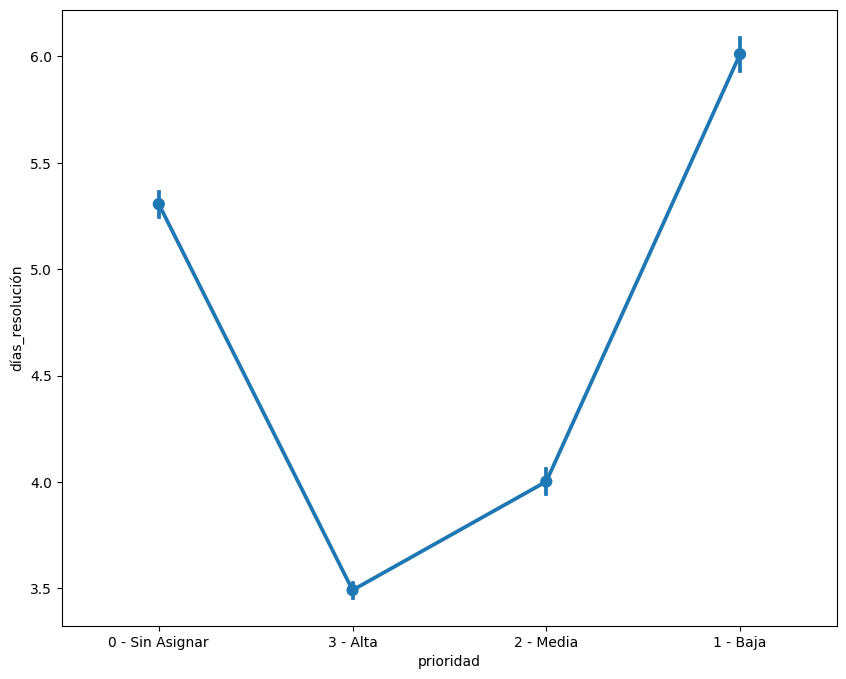

In [9]:
sns.pointplot(x = "prioridad", y = "días_resolución", data = df)

Efectivamente, existe una estrecha relación entre la prioridad y el tiempo de resolución, ya que los tickets que tienen una prioridad alta tardan en resolverse una media de tres días y medio, y los que tienen prioridad media tardan alrededor de cuatro días de media. Sin embargo, los tickets que tienen una prioridad baja tardan una media de seis días en resolverse, así como los tickets que están sin asignar cuentan con una media casi de cinco días y medio en resolverse. Por lo tanto, vemos con estas dos gráficas que los tickets con mayor severidad y prioridad son los que se resuelven antes.

- En la segunda gráfica contestaremos a la siguiente pregunta: ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?. Para eso tendréis que:
  - Crear otro dataframe donde tengáis solo los datos para los datos para los problemas de tipo "Acceso/Login" o "Software".
  - Crear una gráfica donde podamos ver la satisfacción de los clientes en función de los problemas filtrados en el paso anterior.

In [11]:
df['tipo'].unique()

array(['Problema', 'Solicitud'], dtype=object)

In [12]:
df['categoría'].unique()

array(['Acceso/Login', 'Sistema', 'Software', 'Hardware'], dtype=object)

In [13]:
df_problemas = df[(df["categoría"] == "Acceso/Login") | (df["categoría"]  == "Software")]
df_problemas.head(2)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo


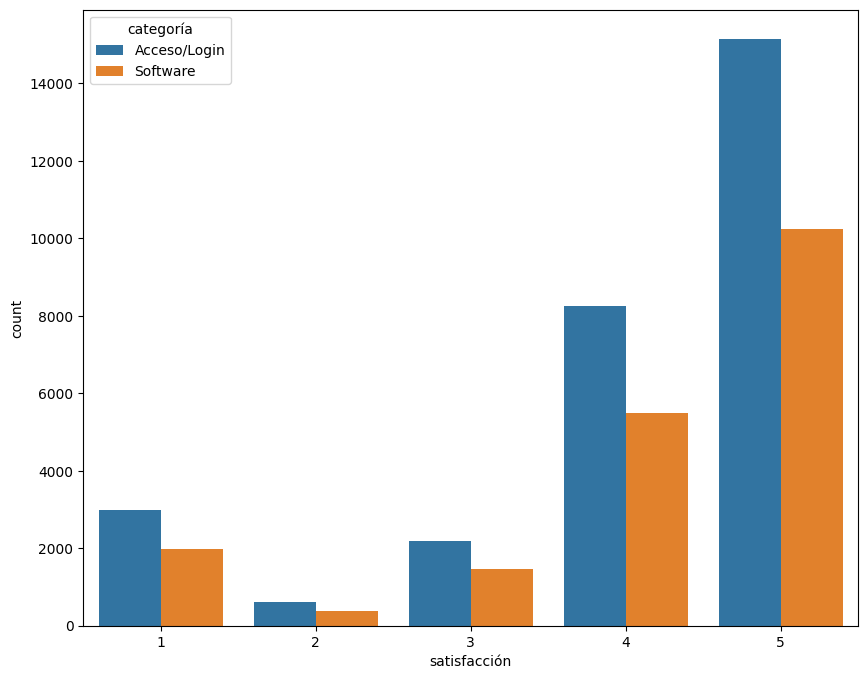

In [14]:
sns.countplot(x = "satisfacción", hue = "categoría", data = df_problemas);

- En la tercera gráfica contestaremos a las siguientes preguntas ¿Cuáles son los empleados que más tickets atienden? ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?. Para contestar a esto haremos 3 gráficas independientes:

  - En la primera gráfica deberemos, ¿Cuáles son los empleados que más tickets atienden?:
      - Sacar el número de tickets por empleado. Pista 💡 Para esto tendremos que usar un groupby.
      - Visualizar el resultado del groupby anterior con la gráfica que sea más adecuada.

In [15]:
df

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo
2,GDDESR-1342539995,2016-06-18,569,29,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3,5,1 semestre,2016,Junio
3,GDDTSR-5942488006,2016-04-28,320,40,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9,5,1 semestre,2016,Abril
4,GDLEER-0042524120,2016-06-03,1842,31,Software,Problema,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29083,TWRTSR-8543883120,2020-02-22,1142,1,Sistema,Solicitud,3 - Mayor,1 - Baja,11,5,1 semestre,2020,Febrero
29084,TWRTSR-8744097039,2020-09-23,223,40,Sistema,Solicitud,1 - Menor,1 - Baja,7,4,2º semestre,2020,Septiembre
29085,TWRTSR-9643846768,2020-01-16,256,7,Sistema,Solicitud,3 - Mayor,1 - Baja,13,5,1 semestre,2020,Enero
29086,TWRTSR-9944138906,2020-11-03,1060,9,Sistema,Solicitud,1 - Menor,1 - Baja,9,5,2º semestre,2020,Noviembre


In [16]:
groupby = df.groupby("id_empleado")["id_ticket"].count()
df_groupby = pd.DataFrame(groupby).reset_index()
df_empleados_sort_ticket = df_groupby.sort_values("id_ticket", ascending = False)
df_empleados_sort_ticket

,id_empleado,id_ticket
753,754,73
284,285,73
635,636,71
522,523,69
78,79,69
...,...,...
1617,1618,31
71,72,31
1194,1195,29
98,99,27


<Axes: xlabel='id_empleado', ylabel='id_ticket'>

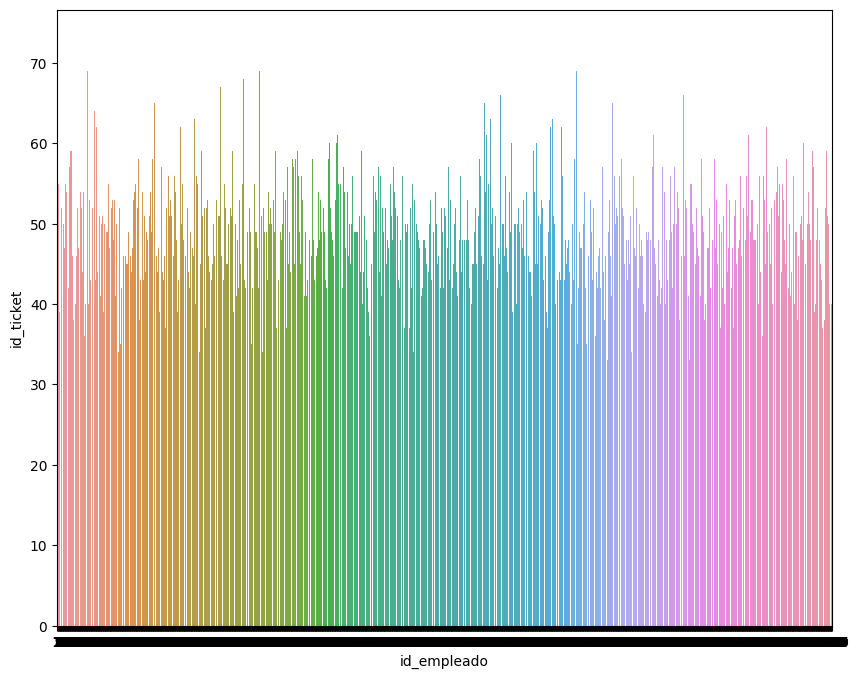

In [18]:
sns.barplot(x = "id_empleado", y = "id_ticket", data = df_empleados_sort_ticket)

- En la segunda gráfica, ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes?
  - Deberéis crear una lista donde tengamos los "id's" de los 10 empleados que resuelvan más cantidad tickets y con los 10 empleados que resuelvan menos cantidad de tickets.
  - Usando la lista generada en el ejercicio anterior filtrad el dataframe para quedaros solo con los 10 seleccionados en el ejercicio anterior.
  - Una vez tengáis el dataframe filtrado, cread una gráfica donde veamos el tiempo de resolución de solicitudes para cada empleado

In [22]:
df_empleados_sort_ticket_top = df_empleados_sort_ticket.head(10)
df_empleados_sort_ticket_top

,id_empleado,id_ticket
753,754,73
284,285,73
635,636,71
522,523,69
78,79,69
1340,1341,69
441,442,68
325,326,68
481,482,68
1447,1448,68


<Axes: xlabel='id_empleado', ylabel='id_ticket'>

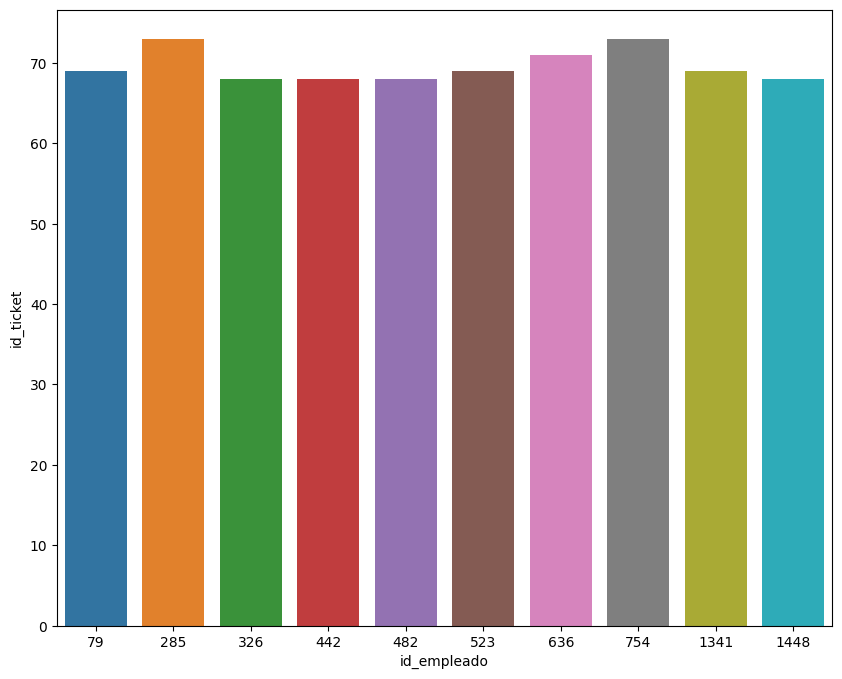

In [26]:
sns.barplot(x = "id_empleado", y = "id_ticket", data = df_empleados_sort_ticket_top)

In [23]:
df_empleados_sort_ticket_tail = df_empleados_sort_ticket.tail(10).sort_values("id_ticket", ascending = True)
df_empleados_sort_ticket_tail

,id_empleado,id_ticket
792,793,26
98,99,27
1194,1195,29
1617,1618,31
71,72,31
1791,1792,32
606,607,32
685,686,32
1383,1384,32
1040,1041,33


<Axes: xlabel='id_empleado', ylabel='id_ticket'>

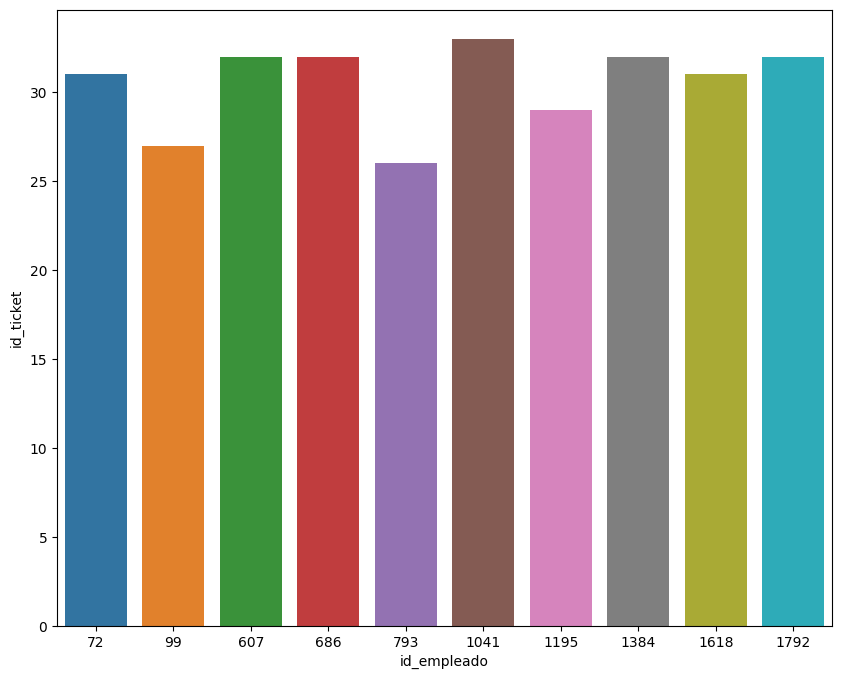

In [27]:
sns.barplot(x = "id_empleado", y = "id_ticket", data = df_empleados_sort_ticket_tail)

- En la tercera gráfica, ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?:
📌 Usaremos los mismos datos que en la pregunta anterior, el dataframe de los 10 empleados más productivos y menos productivos.
  - Cread una gráfica donde veamos la satisfacción de los clientes para cada empleado.

In [32]:
groupby3 = df.groupby("id_empleado")["satisfacción"].mean()
df_groupby3 = pd.DataFrame(groupby3.reset_index())
df_empleados_sort_satis_top = df_groupby3.merge(df_empleados_sort_ticket_top, on = "id_empleado")
df_empleados_sort_satis_top = df_empleados_sort_satis_top.sort_values("satisfacción", ascending = False)
df_empleados_sort_satis_top

,id_empleado,satisfacción,id_ticket
1,285,4.328767,73
0,79,4.260870,69
9,1448,4.220588,68
4,482,4.205882,68
3,442,4.117647,68
7,754,4.068493,73
5,523,4.028986,69
6,636,4.028169,71
8,1341,3.985507,69
2,326,3.941176,68


<Axes: xlabel='id_empleado', ylabel='satisfacción'>

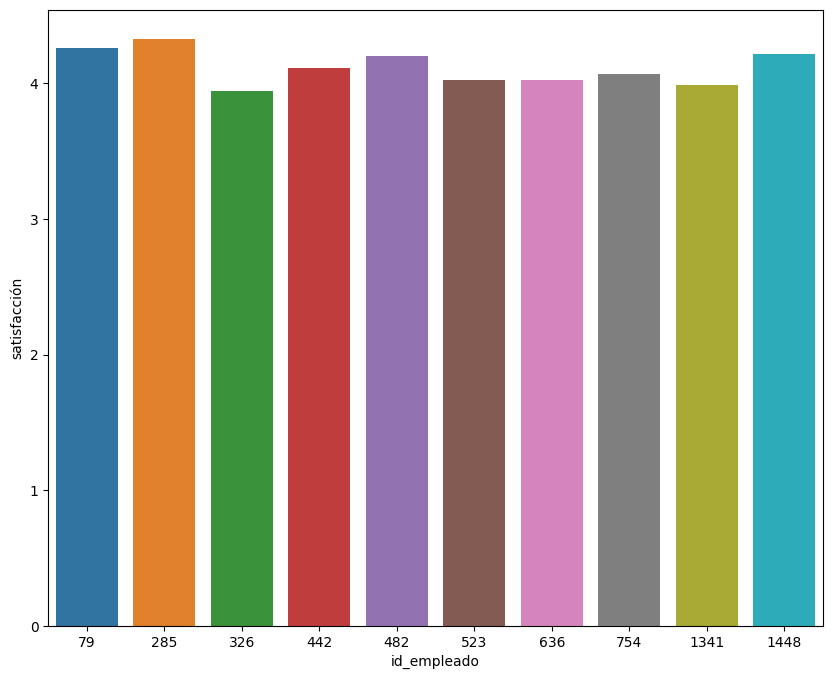

In [34]:
sns.barplot(x = "id_empleado", y = "satisfacción", data = df_empleados_sort_satis_top)

In [37]:
df_empleados_sort_satis_tail = df_groupby3.merge(df_empleados_sort_ticket_tail, on = "id_empleado")
df_empleados_sort_satis_tail = df_empleados_sort_satis_tail.sort_values("satisfacción", ascending = True)
df_empleados_sort_satis_tail

,id_empleado,satisfacción,id_ticket
5,1041,3.696970,33
1,99,3.851852,27
8,1618,3.935484,31
3,686,4.125000,32
7,1384,4.125000,32
9,1792,4.125000,32
2,607,4.156250,32
4,793,4.230769,26
0,72,4.290323,31
6,1195,4.310345,29


<Axes: xlabel='id_empleado', ylabel='satisfacción'>

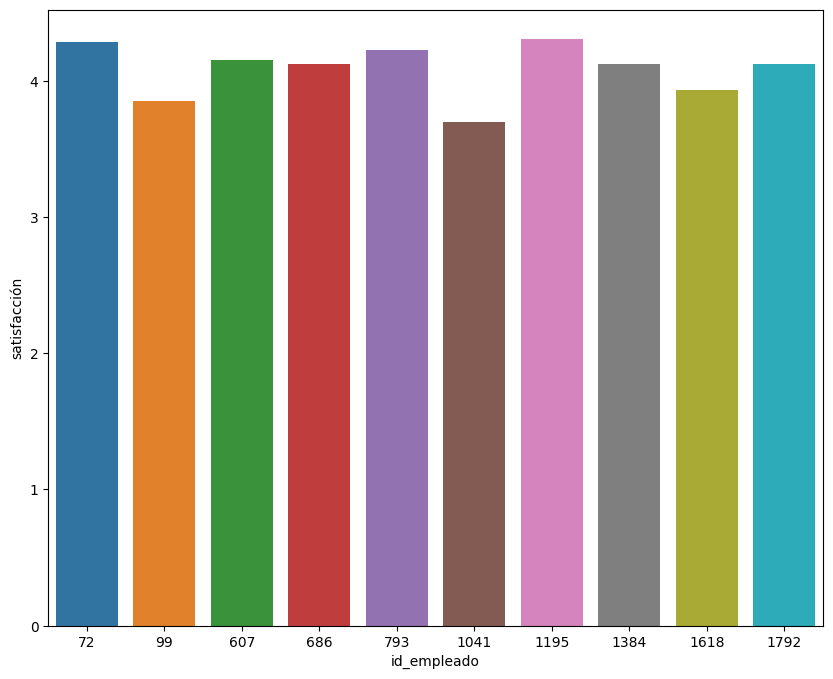

In [38]:
sns.barplot(x = "id_empleado", y = "satisfacción", data = df_empleados_sort_satis_tail)